In [1]:
%pip install insightface onnxruntime

Note: you may need to restart the kernel to use updated packages.


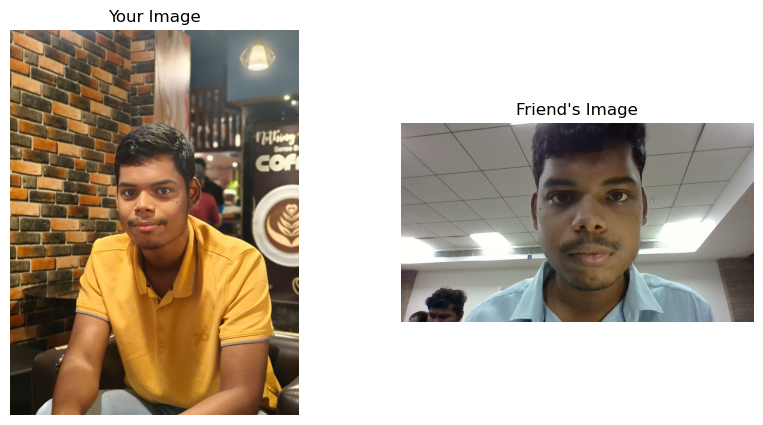

In [2]:
import cv2
import matplotlib.pyplot as plt

# Get image paths from user input
your_image_path = r"C:\Users\adity\OneDrive\Pictures\Saved Pictures\Myself3.jpg"
friends_image_path =r"C:\Users\adity\OneDrive\Pictures\Camera Roll\WIN_20250821_17_51_07_Pro.jpg"

your_image = cv2.imread(your_image_path)
friends_image = cv2.imread(friends_image_path)

# Check if images were loaded successfully
if your_image is None:
    print(f"Error: Could not load your image from {your_image_path}")
elif friends_image is None:
    print(f"Error: Could not load friend's image from {friends_image_path}")
else:
    # Convert to RGB for displaying with matplotlib
    your_image_rgb = cv2.cvtColor(your_image, cv2.COLOR_BGR2RGB)
    friends_image_rgb = cv2.cvtColor(friends_image, cv2.COLOR_BGR2RGB)

    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(your_image_rgb)
    axes[0].set_title('Your Image')
    axes[0].axis('off')
    axes[1].imshow(friends_image_rgb)
    axes[1].set_title('Friend\'s Image')
    axes[1].axis('off')
    plt.show()

In [3]:
!pip install face_recognition dlib

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Failed to build dlib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  running bdist_wheel
  running build
  running build_ext
  
  
                     CMake is not installed on your system!
  
      Or it is possible some broken copy of cmake is installed on your system.
      It is unfortunately very common for python package managers to include
      broken copies of cmake.  So if the error above this refers to some file
      path to a cmake file inside a python or anaconda or miniconda path then you
      should delete that broken copy of cmake from your computer.
  
      Instead, please get an official copy of cmake from one of these known good
      sources of an official cmake:
          - cmake.org (this is how windows users should get cmake)
          - apt install cmake (for Ubuntu or Debian based systems)
          - yum install cmake (for Redhat or CenOS based systems)
  
      On a linux machine you can run `which cmake` to see what cmake you are
      act

In [4]:
import insightface
import onnxruntime as ort

# Load a face analysis model
# We use 'buffalo_l' which includes detection and landmarks, suitable for CPU
try:
    # Try GPU first if available, but fall back to CPU
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
    app = insightface.app.FaceAnalysis(name='buffalo_l', providers=providers)
    app.prepare(ctx_id=0, det_size=(640, 640)) # ctx_id=0 for GPU, -1 for CPU

except Exception as e:
    print(f"GPU not available or encountered error: {e}. Falling back to CPU.")
    providers = ['CPUExecutionProvider']
    app = insightface.app.FaceAnalysis(name='buffalo_l', providers=providers)
    app.prepare(ctx_id=-1, det_size=(640, 640)) # ctx_id=-1 for CPU


# Detect faces and extract landmarks from your image
your_faces = app.get(your_image)

# Detect faces and extract landmarks from friend's image
friends_faces = app.get(friends_image)

# Check if faces were detected in both images
if not your_faces:
    print("No face found in your image.")
elif not friends_faces:
    print("No face found in your friend's image.")
else:
    print(f"Face detection and landmark extraction complete. Found {len(your_faces)} face(s) in your image and {len(friends_faces)} face(s) in friend's image.")
    # Store the results
    # Assuming only one face in each image for simplicity in subsequent steps
    your_face_result = your_faces[0]
    friends_face_result = friends_faces[0]

C:\Users\adity\anaconda3\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [5]:
import insightface
import onnxruntime as ort

# Load a face analysis model
# We use 'buffalo_l' which includes detection and landmarks, suitable for CPU
try:
    # Try GPU first if available, but fall back to CPU
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
    app = insightface.app.FaceAnalysis(name='buffalo_l', providers=providers)
    app.prepare(ctx_id=0, det_size=(640, 640)) # ctx_id=0 for GPU, -1 for CPU

except Exception as e:
    print(f"GPU not available or encountered error: {e}. Falling back to CPU.")
    providers = ['CPUExecutionProvider']
    app = insightface.app.FaceAnalysis(name='buffalo_l', providers=providers)
    app.prepare(ctx_id=-1, det_size=(640, 640)) # ctx_id=-1 for CPU


# Detect faces and extract landmarks from your image
your_faces = app.get(your_image)

# Detect faces and extract landmarks from friend's image
friends_faces = app.get(friends_image)

# Check if faces were detected in both images
if not your_faces:
    print("No face found in your image.")
elif not friends_faces:
    print("No face found in your friend's image.")
else:
    print(f"Face detection and landmark extraction complete. Found {len(your_faces)} face(s) in your image and {len(friends_faces)} face(s) in friend's image.")
    # Store the results
    # Assuming only one face in each image for simplicity in subsequent steps
    your_face_result = your_faces[0]
    friends_face_result = friends_faces[0]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adity/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [6]:
# Inspect the contents of your_face_result and friends_face_result
print("Inspecting your_face_result:")
print(your_face_result)
print("\nInspecting friends_face_result:")
print(friends_face_result)

# Specifically check the 'landmarks' attribute
print("\nyour_face_result.landmarks is None:", your_face_result.landmarks is None)
print("friends_face_result.landmarks is None:", friends_face_result.landmarks is None)

if your_face_result.landmarks is None or friends_face_result.landmarks is None:
    print("\nDebug: Landmarks are indeed None for one or both faces.")
    print("This suggests an issue with the face analysis model or the input images preventing landmark detection.")
    print("Re-running the face analysis step might help, or the model might not be suitable for these specific faces/image qualities.")


Inspecting your_face_result:
{'bbox': array([446.19955, 530.5738 , 738.5942 , 898.87085], dtype=float32), 'kps': array([[496.91464, 674.1314 ],
       [633.372  , 668.36084],
       [549.45996, 737.9356 ],
       [507.67453, 806.79987],
       [633.35077, 802.799  ]], dtype=float32), 'det_score': np.float32(0.8600457), 'landmark_3d_68': array([[ 4.5599692e+02,  6.6766302e+02,  2.5347809e+02],
       [ 4.6298636e+02,  7.0959875e+02,  2.4861340e+02],
       [ 4.6967276e+02,  7.5225940e+02,  2.4072110e+02],
       [ 4.7660519e+02,  7.9310590e+02,  2.2529730e+02],
       [ 4.8327716e+02,  8.3050616e+02,  1.9160838e+02],
       [ 4.9805844e+02,  8.5779974e+02,  1.6062524e+02],
       [ 5.1483282e+02,  8.7833844e+02,  1.3200941e+02],
       [ 5.3381616e+02,  8.9404572e+02,  9.5098770e+01],
       [ 5.7504596e+02,  9.0379205e+02,  6.7445976e+01],
       [ 6.2527899e+02,  8.9214862e+02,  6.9793076e+01],
       [ 6.6553613e+02,  8.7048358e+02,  9.6826935e+01],
       [ 6.9803186e+02,  8.4332623

Face alignment and warping complete.


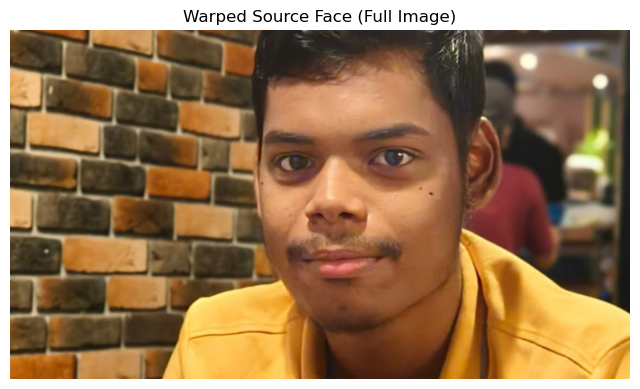

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def align_and_warp_face(source_img, target_img, source_face, target_face):
    # Extract 68 3D landmarks and use only the 2D (x, y) coordinates
    source_landmarks_3d = source_face.landmark_3d_68
    target_landmarks_3d = target_face.landmark_3d_68

    # Check if landmarks were successfully extracted and are not None
    if source_landmarks_3d is None or target_landmarks_3d is None:
        print("Error: 68 3D Landmark extraction failed for one or both faces.")
        return None

    # Ensure landmarks are in the correct shape (68, 3)
    if source_landmarks_3d.shape != (68, 3) or target_landmarks_3d.shape != (68, 3):
        print(f"Error: Unexpected landmark shape. Source shape: {source_landmarks_3d.shape}, Target shape: {target_landmarks_3d.shape}")
        return None

    # Use only the x and y coordinates for 2D alignment
    source_points = np.float32(source_landmarks_3d[:, :2])
    target_points = np.float32(target_landmarks_3d[:, :2])

    # Calculate affine transformation matrix
    # Using a subset of points around eyes and mouth which are crucial for alignment.
    # Example points (indices based on standard 68-point model):
    # Left eye (outer, inner), Right eye (inner, outer), Nose tip, Mouth corners (left, right)
    source_subset_indices = [36, 39, 42, 45, 30, 48, 54]

    # Use the same indices for target landmarks
    source_subset = source_points[source_subset_indices]
    target_subset = target_points[source_subset_indices]


    # Use estimateAffine2D for a more robust estimation with RANSAC
    M, _ = cv2.estimateAffine2D(source_subset, target_subset)

    if M is None:
        print("Error: Could not estimate affine transformation matrix.")
        return None

    # Get the dimensions of the target image
    h, w = target_img.shape[:2]

    # Apply the transformation to the source image
    # The output size should match the target image's size for subsequent steps
    warped_source_face = cv2.warpAffine(source_img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    return warped_source_face

# Call the function to get the warped face
warped_face = align_and_warp_face(your_image, friends_image, your_face_result, friends_face_result)

if warped_face is not None:
    print("Face alignment and warping complete.")
    # Display the warped face (optional, for visualization)
    # Note: The warped_face is the full source image warped, not just the face region
    # We will need to extract and blend the face region in the next step.
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(warped_face, cv2.COLOR_BGR2RGB))
    plt.title("Warped Source Face (Full Image)")
    plt.axis('off')
    plt.show()


Face blending complete.


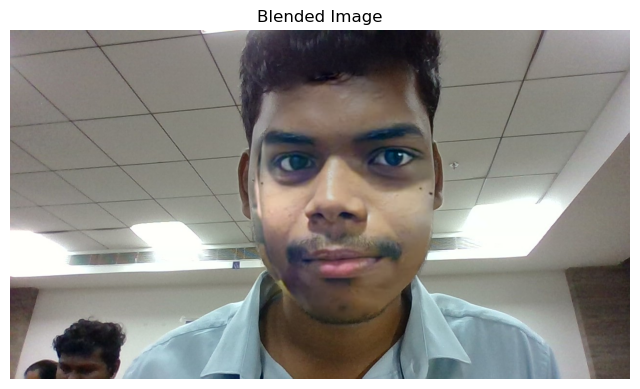

In [8]:
import cv2
import numpy as np

def blend_faces(target_img, warped_source_img, target_face_bbox):
    """
    Blends the warped source face onto the target image using seamless cloning.

    Args:
        target_img (numpy.ndarray): The target image.
        warped_source_img (numpy.ndarray): The source image warped to align with the target.
        target_face_bbox (numpy.ndarray): Bounding box of the face in the target image
                                          (format: [x1, y1, x2, y2]).

    Returns:
        numpy.ndarray: The blended composite image.
    """
    # 1. Calculate the center of the target face's bounding box
    x1, y1, x2, y2 = target_face_bbox.astype(int)
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    center = (center_x, center_y)

    # 2. Create a mask for the source face within the warped source image
    # We can create a simple elliptical mask based on the target face bounding box size
    mask = np.zeros_like(target_img, dtype=np.uint8)
    mask_center = center
    mask_axes = ((x2 - x1) // 2, (y2 - y1) // 2)
    cv2.ellipse(mask, mask_center, mask_axes, 0, 0, 360, (255, 255, 255), -1)

    # Ensure mask is grayscale for seamlessClone
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)


    # 3. Use OpenCV's cv2.seamlessClone function to blend
    # Ensure the warped_source_img is the same type as target_img
    warped_source_img_8u = cv2.convertScaleAbs(warped_source_img)
    target_img_8u = cv2.convertScaleAbs(target_img)


    # Perform seamless cloning
    # Normal Clone (cv2.NORMAL_CLONE) is often better for texture transfer
    # Mixed Clone (cv2.MIXED_CLONE) is better for color and luminance transfer
    blended_img = cv2.seamlessClone(warped_source_img_8u, target_img_8u, mask_gray, center, cv2.NORMAL_CLONE)

    return blended_img

# Call the blend_faces function
# friends_image is the target image
# warped_face is the warped source image
# friends_face_result.bbox is the bounding box of the target face
blended_image = blend_faces(friends_image, warped_face, friends_face_result.bbox)

if blended_image is not None:
    print("Face blending complete.")
    # Display the blended image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title("Blended Image")
    plt.axis('off')
    plt.show()

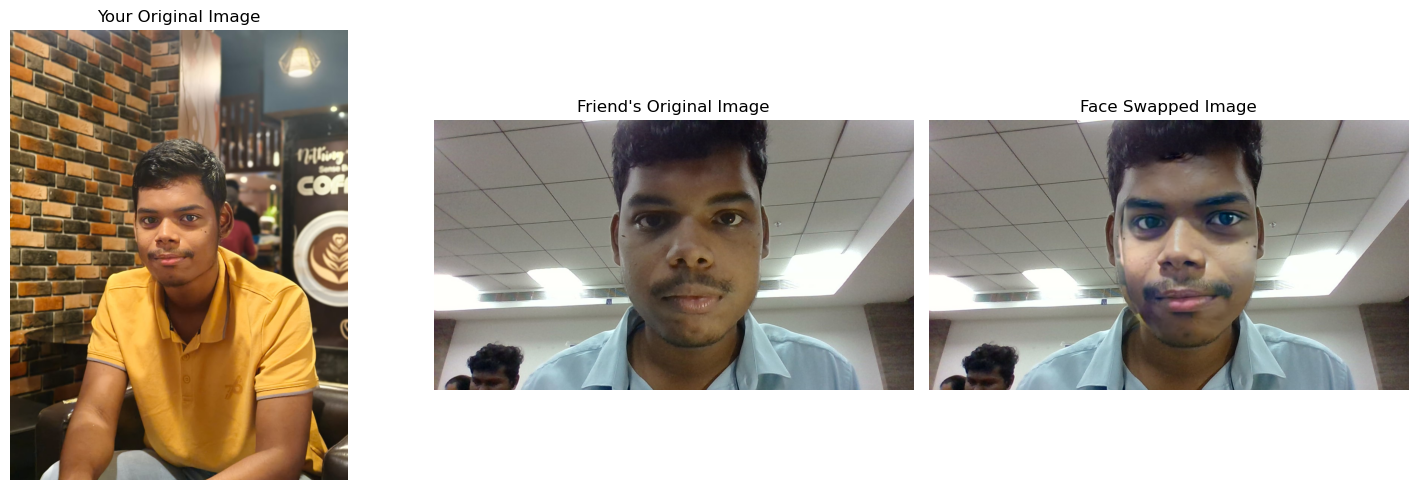

In [9]:
# Ensure the blended image is in RGB format for displaying with matplotlib
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original your image
axes[0].imshow(your_image_rgb)
axes[0].set_title('Your Original Image')
axes[0].axis('off')

# Display the original friend's image
axes[1].imshow(friends_image_rgb)
axes[1].set_title('Friend\'s Original Image')
axes[1].axis('off')

# Display the face-swapped image
axes[2].imshow(blended_image_rgb)
axes[2].set_title('Face Swapped Image')
axes[2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()